# Project Bimbingan Karir Data Science

## Daftar Isi
1. Pengumpulan Data
1. Menelaah Data
1. Validasi Data
1. Menentukan Object Data
1. Membersihkan Data
1. Konstruksi Data
1. Modelling
1. Evaluasi
1. Streamlit
1. Kesimpulan



### 1) Pengumpulan Data



Data cleveland

### 2) Menelaah Data

Memasukkan library yang dibutuhkan untuk meninjau data.

In [337]:
import pandas as pd
import re
import numpy as np
import itertools

#### Load Data

Memasukkan dataset yang dibutuhkan dengan menyimpan alamat dataset kedalam sebuah variabel. 

In [338]:
# # Gunakan kode ini jika menggunakan google colab dan dataset berada di google drive
# from google.colab import drive
# drive.mount('/content/drive')

# dir = '/content/drive/MyDrive/Dataset/heart+disease/hungarian.data'

In [339]:
# Gunakan kode ini jika dataset ada di penyimpanan lokal
dir = 'Dataset/heart+disease/hungarian.data'

Membaca dataset dengan melakukan iterasi

In [340]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

Mengubah dataset menjadi dataframe dengan jumlah kolom dan baris sesuai dengan deskripsi dataset. Pada kasus dataset ini terdiri dari 76 kolom.

In [341]:
data = itertools.takewhile(
  lambda x: len(x) == 76,
  (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


Menampilkan informasi dari dataset yang sudah diubah menjadi dataframe.

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Pada dataset ini terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [343]:
# memilih sebagian dari DataFrame df (semua kecual kolom terakhir)
df = df.iloc[:,:-1]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
3,1257,0,48,0,1,1,1,-9,4,138,...,-9,2,-9,1,1,1,1,1,-9.,-9.
4,1258,0,54,1,1,0,1,-9,3,150,...,-9,1,-9,1,1,1,1,1,-9.,-9.


In [344]:
# menghapus kolom pertama dari DataFrame df.
df = df.drop(df.columns[0], axis=1)
df.head()


,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0,40,1,1,0,0,-9,2,140,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
1,0,49,0,1,0,0,-9,3,160,1,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
2,0,37,1,1,0,0,-9,2,130,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
3,0,48,0,1,1,1,-9,4,138,0,...,-9,2,-9,1,1,1,1,1,-9.,-9.
4,0,54,1,1,0,1,-9,3,150,0,...,-9,1,-9,1,1,1,1,1,-9.,-9.


In [345]:
# mengubah tipe data seluruh nilai dalam DataFrame df menjadi float sesuai dengan nilai null yaitu -9.0
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

### 3) Validasi Data


Tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya, seperti mengubah nilai -9.0 menjadi nilai null sesuai dengan deskripsi dataset.

In [346]:
# menggantikan setiap nilai -9.0 dalam DataFrame dengan nilai NaN
df.replace(-9.0, np.nan, inplace=True)

df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


menghitung jumlah nilai null yang ada

In [347]:
# menghitung jumlah nilai-nilai yang hilang (NaN) dalam setiap kolom dari objek DataFrame yang disimpan dalam variabel df
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [348]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

### 4) Menentukan Object Data


Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

In [350]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]

df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [351]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [352]:
# mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)

df_selected.head()


/var/folders/cf/w7254k811d79k5l3f_5kw9zh0000gp/T/ipykernel_72532/692977977.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [353]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


menghitung jumlah fitur pada dataset

In [354]:
# menghitung jumlah nilai unik dalam setiap kolom
df_selected.nunique()

age          38
sex           2
cp            4
trestbps     31
chol        153
fbs           2
restecg       3
thalach      71
exang         2
oldpeak      10
slope         3
ca            2
thal          3
target        5
dtype: int64

In [355]:
# Menghitung jumlah data dari nilai unik dalam setiap kolom
for col in df_selected.columns :
    print(col, ': ')
    print(df_selected[col].value_counts())
    print(" ")

age : 
age
54.0    25
48.0    19
52.0    17
49.0    15
55.0    15
46.0    13
50.0    12
53.0    12
43.0    12
41.0    11
39.0    11
47.0    10
56.0    10
58.0     9
51.0     9
59.0     8
45.0     8
37.0     8
40.0     7
44.0     7
38.0     7
42.0     7
36.0     5
35.0     5
57.0     5
34.0     4
32.0     4
65.0     3
31.0     2
60.0     2
33.0     2
61.0     2
29.0     2
62.0     2
63.0     1
66.0     1
28.0     1
30.0     1
Name: count, dtype: int64
 
sex : 
sex
1.0    213
0.0     81
Name: count, dtype: int64
 
cp : 
cp
4.0    123
2.0    106
3.0     54
1.0     11
Name: count, dtype: int64
 
trestbps : 
trestbps
120.0    65
130.0    54
140.0    50
150.0    23
110.0    21
160.0    20
125.0     8
100.0     6
180.0     6
135.0     5
145.0     5
170.0     5
112.0     3
115.0     2
124.0     2
122.0     2
118.0     2
106.0     1
200.0     1
92.0      1
155.0     1
98.0      1
128.0     1
132.0     1
108.0     1
190.0     1
142.0     1
113.0     1
136.0     1
138.0     1
105.0     1
Name: co

### 5) Membersihkan Data


Tahap ini dilakukan pembersihan data agar model yang dihasilkan lebih akurat

menghitung jumlah null values yang ada diddalam dataset

In [356]:
# menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom dari DataFrame df_selected.
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan hasil tersebut terdapat beberapa fitur yang memiliki data bernilai null sebanyak 90% dari seluruh data, sehingga perlu dilakukan penghapusan fitur.

In [357]:
# menghapus kolom-kolom tertentu dari dataframe
columns_to_drop = ['slope', 'ca', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Karena masih terdapat nilai null dibeberapa fitur, maka dilakukan pengisian nilai null menggunakan nilai rata-rata di setiap fitur.

In [358]:
# mengambil data kolom-kolom tertentu tanpa nilai null nya
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [359]:
# mengubah tipe data dari variabel-variabel yang berisi rata-rata kolom-kolom tertentu menjadi tipe data float
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [360]:
# menghitung rata-rata (dibulatkan) dari variabel-variabel yang berisi rata-rata kolom-kolom tertentu
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

mengubah nilai null menjadi nilai rata-rata yang sudah ditentukan sebelumnya

In [361]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
               'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [362]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

cek duplikasi data


In [363]:
# mendeteksi dan menampilkan baris-baris duplikat dalam DataFrame dfClean
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [364]:
# mencetak semua baris duplikat dalam DataFrame dfClean
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data duplikat



In [365]:
# menghapus baris-baris duplikat dari DataFrame dfClean 
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [366]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [367]:
# menghitung jumlah kemunculan setiap nilai dalam kolom "target" pada DataFrame dfClean
dfClean['target'].value_counts()

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

In [368]:
# menambahakn library untuk membuat plot dan visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

Mencari korelasi antar fitur

In [369]:
# menghitung koefisien korelasi antara semua pasangan kolom numerik dalam DataFrame dfClean
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

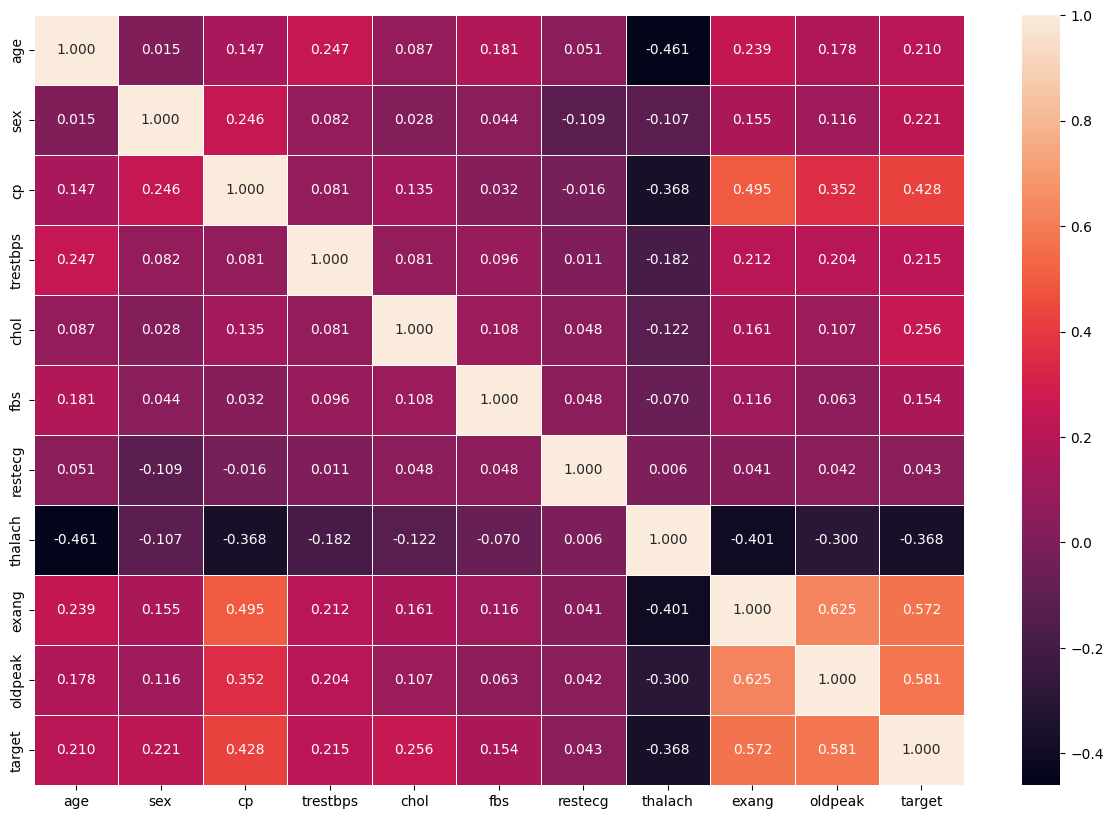

In [370]:
# membuat sebuah heatmap dari matriks korelasi 
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")


### 6) Konstruksi Data


Tahap Konstruksi data salah satu tujuannya adalah untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [371]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [372]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Memisahkan antara fitur dan target lalu simpan kedalam variabel.

In [373]:
# memisahkan fitur-fitur dalam variabel X dan variabel target dalam variabel y
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Mengecek persebaran jumlah target.


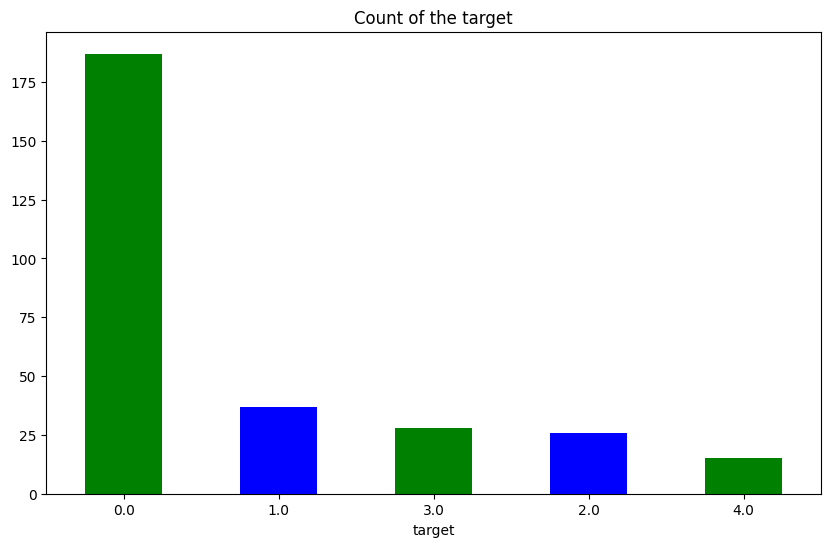

In [374]:
# Mengecek persebaran jumlah target menggunakan diagram batang.
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Pada Grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu.
Menyeimbangkan target ada 2 cara yaitu oversampling dan undersampling. 
- oversampling dilakukan jika jumlah dataset sedikit. 
- sedangkan undersampling dilakukan jika jumlah data terlalu banyak.

Dilakukan oversampling karena jumlah data tidak banyak. Salah satu metode yang Oversampling yang akan kita
gunakan adalah SMOTE

In [375]:
# mengimpor fungsi SMOTE 
from imblearn.over_sampling import SMOTE

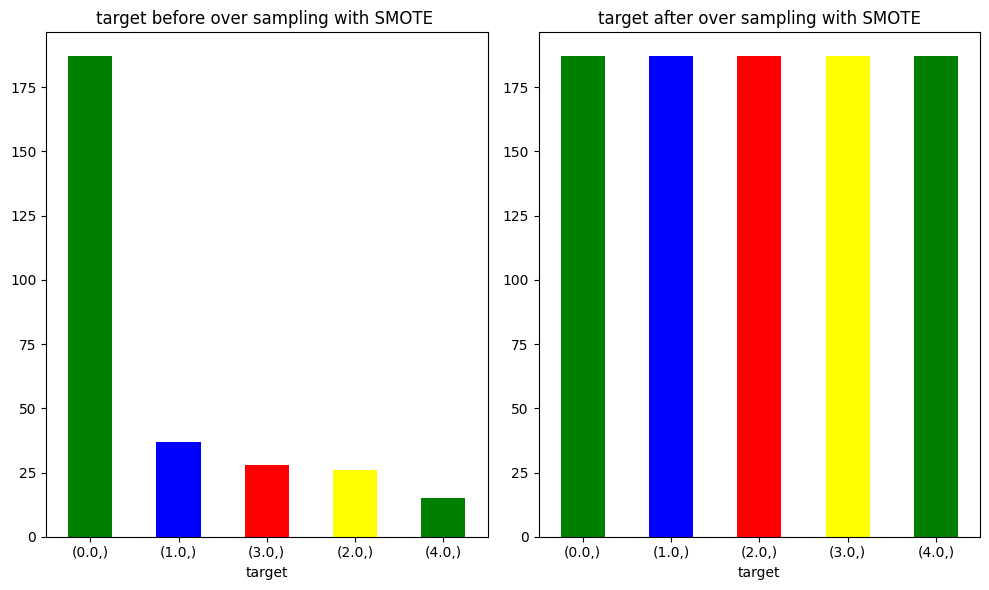

In [376]:
# oversampling dengan smote
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [377]:
# menghitung jumlah kemunculan setiap nilai dari variabel y (sebelum oversampling)
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
Name: count, dtype: int64

In [378]:
# menghitung jumlah kemunculan setiap nilai dari variabel y (sebelum oversampling)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
Name: count, dtype: int64

Mengecek apakah perlu dilakukan normalisasi/standarisasi pada dataset.

In [379]:
# mendapatkan ringkasan statistik dari DataFrame dfClean
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset. Sehingga perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

In [380]:
# Normalisasi menggunakan minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

935

In [381]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Membagi fitur dan target menjadi data train dan test.

In [382]:
# Memasukkan fungsi untuk split data
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

### 7) Modelling


Tahap ini memulai untuk membangun sebuah model.

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi
ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.

In [383]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')
    metric_dict={'accuracy': round(acc,3),
                'recall': round(rcl,3),
                'F1 score': round(f1,3),
                'Precision score': round(ps,3)
                }
    return print(metric_dict)

#### a) Oversample

##### KNN

Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [384]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from  import dtClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [385]:
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [386]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

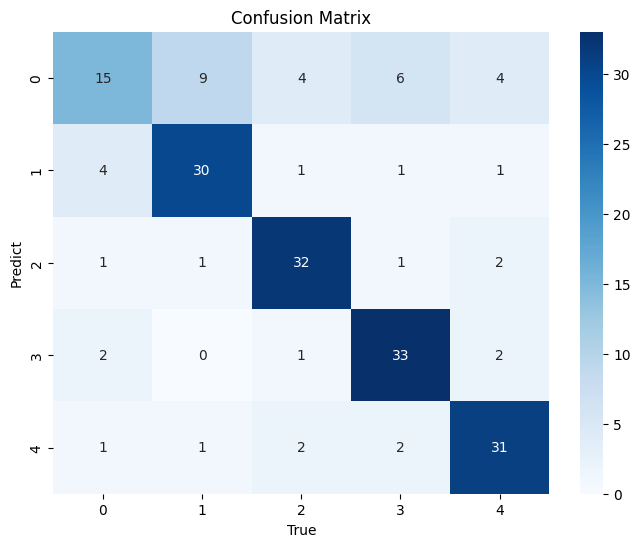

In [387]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##### Random Forest

Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna mengatur jumlah pohon keputusan yang akan dibangun.

In [388]:
model_rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_smote.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [389]:
y_pred_rf = model_rf_smote.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [390]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


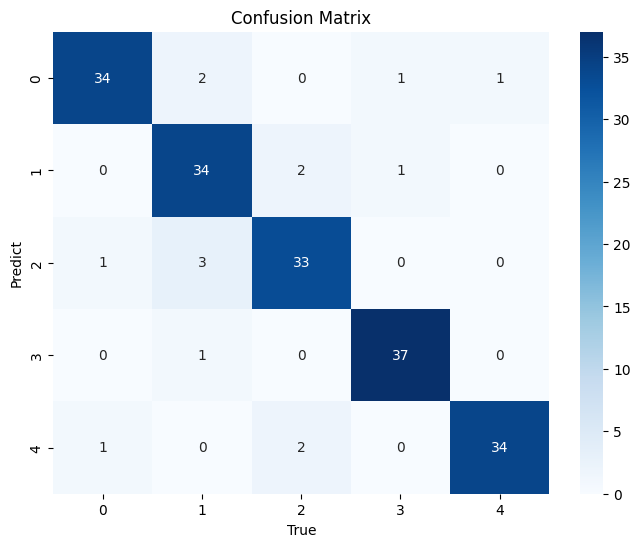

In [391]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##### Decision Tree


In [392]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [393]:
y_pred_dt = dt_model.predict(X_test)

# Evaluate the dtoost model
print("\ndt Model:")
accuracy_dt_smote = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


dt Model:
Accuracy: 0.781
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        38
         1.0       0.74      0.84      0.78        37
         2.0       0.79      0.73      0.76        37
         3.0       0.81      0.68      0.74        38
         4.0       0.80      0.89      0.85        37

    accuracy                           0.78       187
   macro avg       0.78      0.78      0.78       187
weighted avg       0.78      0.78      0.78       187



In [394]:
evaluation(y_test,y_pred_dt)

{'accuracy': 0.781, 'recall': 0.781, 'F1 score': 0.779, 'Precision score': 0.783}


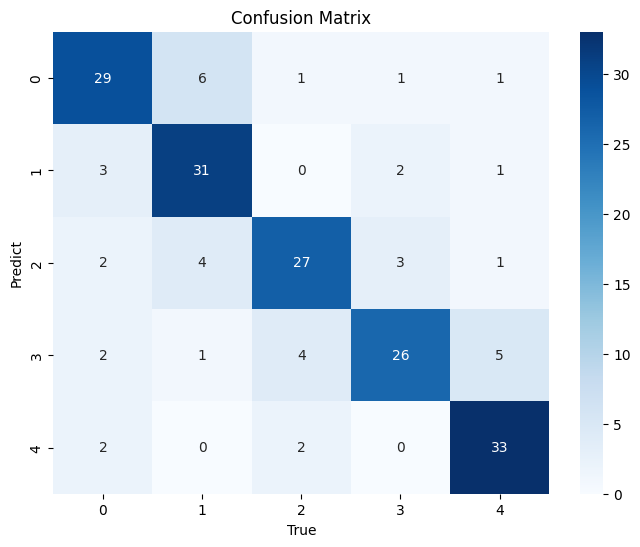

In [395]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### b) Oversample + Normalisasi

Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi.
Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan dtoost. Sekaligus dibuat visualisasi hasil evaluasi pada
masing-masing model.

##### KNN

In [396]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [397]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [398]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


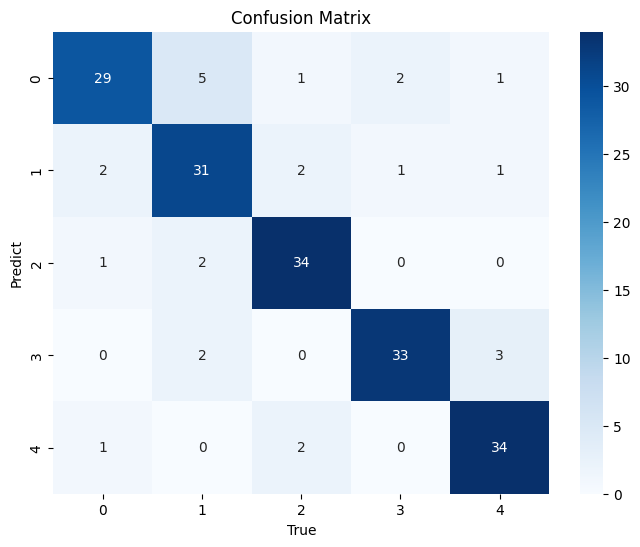

In [399]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##### Random Forest

In [400]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [401]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [402]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


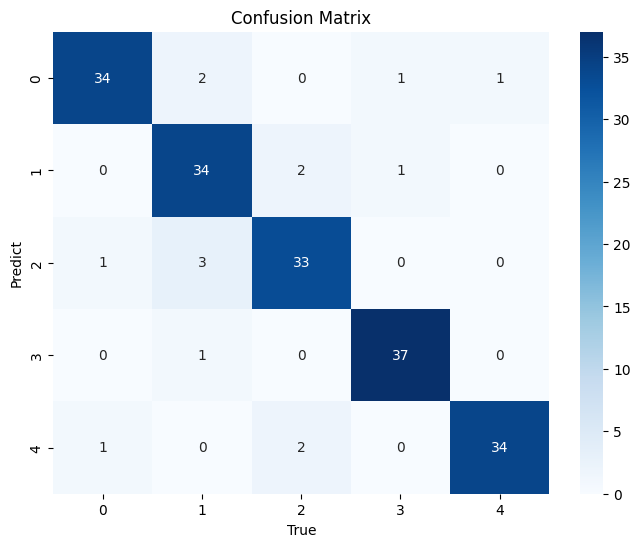

In [403]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##### Decision Tree

In [404]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_normal, y_train_normal)

DecisionTreeClassifier()

In [405]:
y_pred_dt = dt_model.predict(X_test_normal)

# Evaluate the dtoost model
print("\ndtoost Model:")
accuracy_dt_smote_normal = round(accuracy_score(y_test_normal, y_pred_dt),3)
print("Accuracy:",accuracy_dt_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_dt))


dtoost Model:
Accuracy: 0.791
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        38
         1.0       0.74      0.78      0.76        37
         2.0       0.80      0.76      0.78        37
         3.0       0.82      0.74      0.78        38
         4.0       0.80      0.89      0.85        37

    accuracy                           0.79       187
   macro avg       0.79      0.79      0.79       187
weighted avg       0.79      0.79      0.79       187



In [406]:
evaluation(y_test_normal,y_pred_dt)

{'accuracy': 0.791, 'recall': 0.791, 'F1 score': 0.791, 'Precision score': 0.792}


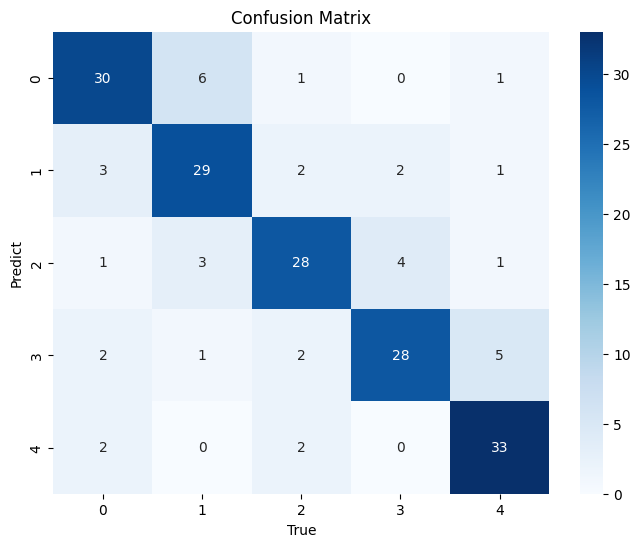

In [407]:
cm = confusion_matrix(y_test_normal, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### c) Tunning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan dtoost), namun data yang digunakan
adalah data yang sudah dilakukan TunNIng Parameter, Normalisasi, dan Oversample.

##### KNN

In [408]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [409]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 14, 'algorithm': 'auto'}


In [410]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [411]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


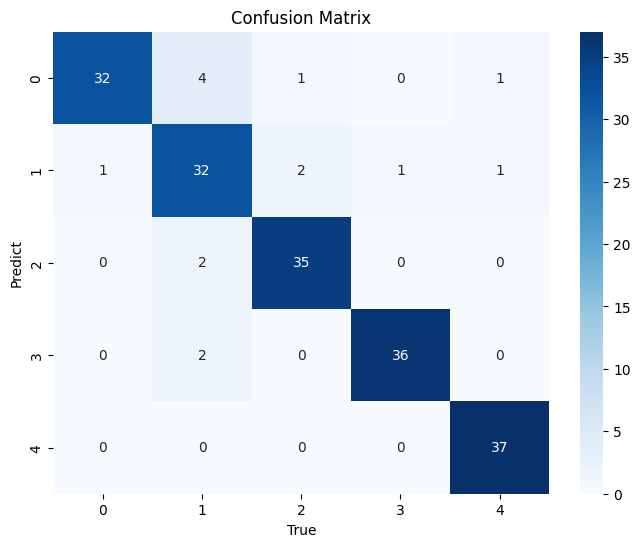

In [412]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##### RandomForest

In [413]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/Users/gustiangga/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [414]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.87      0.89      0.88        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [415]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.915, 'Precision score': 0.915}


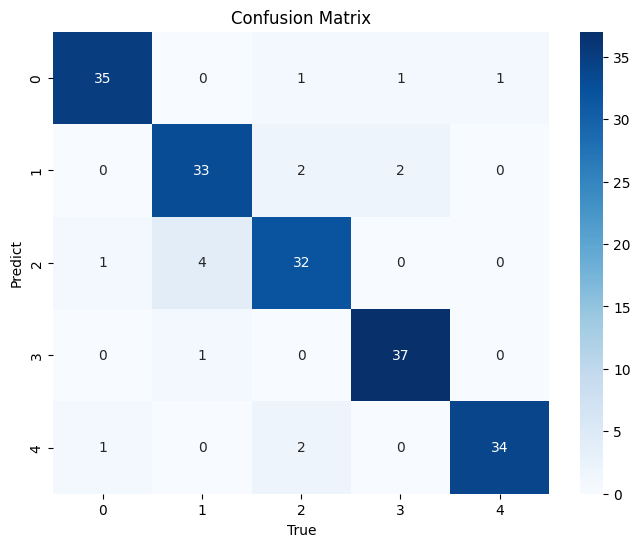

In [416]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##### Decision Tree

In [417]:
dt_model = DecisionTreeClassifier()

param_grid ={
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
}

dt_model = RandomizedSearchCV (dt_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

dt_model.fit(X_train_normal, y_train_normal)

best_params = dt_model.best_params_
print (f"Best parameters: {best_params}")

Best parameters: {'splitter': 'best', 'criterion': 'gini'}


/Users/gustiangga/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [418]:
y_pred_dt = dt_model.predict(X_test_normal)

# Evaluate the dtoost model
print("\ndtoost Model:")
accuracy_dt_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_dt),3)
print("Accuracy:",accuracy_dt_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_dt))


dtoost Model:
Accuracy: 0.775
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.78        38
         1.0       0.71      0.78      0.74        37
         2.0       0.76      0.68      0.71        37
         3.0       0.84      0.71      0.77        38
         4.0       0.82      0.89      0.86        37

    accuracy                           0.78       187
   macro avg       0.78      0.78      0.77       187
weighted avg       0.78      0.78      0.77       187



In [419]:
evaluation(y_test_normal,y_pred_dt)

{'accuracy': 0.775, 'recall': 0.775, 'F1 score': 0.774, 'Precision score': 0.778}


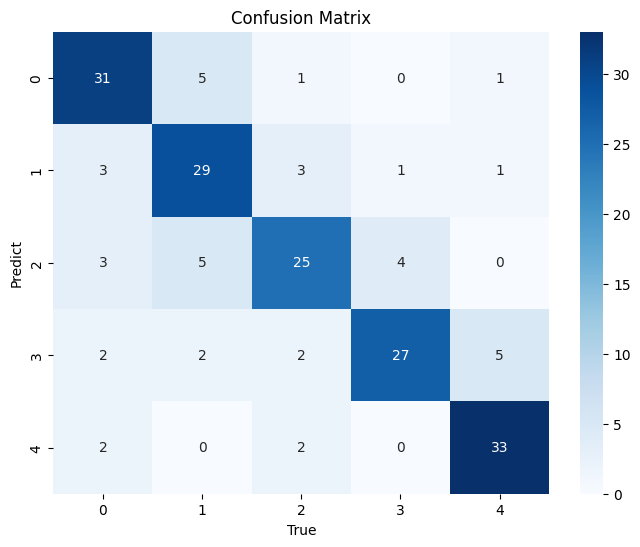

In [420]:
cm = confusion_matrix(y_test_normal, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 8) Evaluasi


Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

In [421]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour', 'Random Forest', 'Decision Tree'], 
                            'Accuracy': [accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_dt_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,Decision Tree,78.1


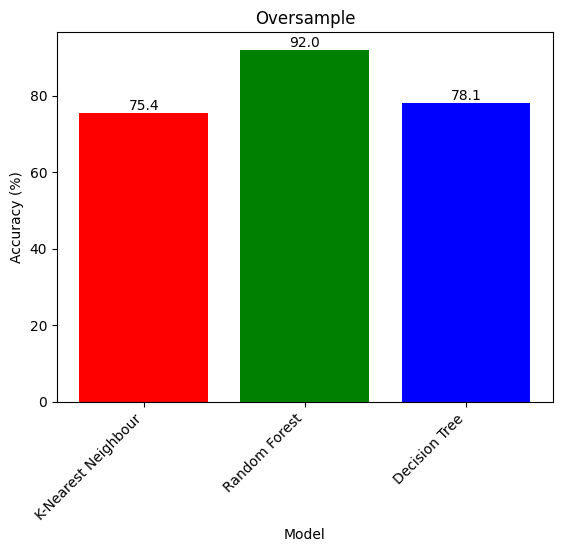

In [422]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha= 'center', va='bottom')
plt.show()

In [423]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 
                            'Accuracy': [accuracy_knn_smote_normal*100, accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,91.7


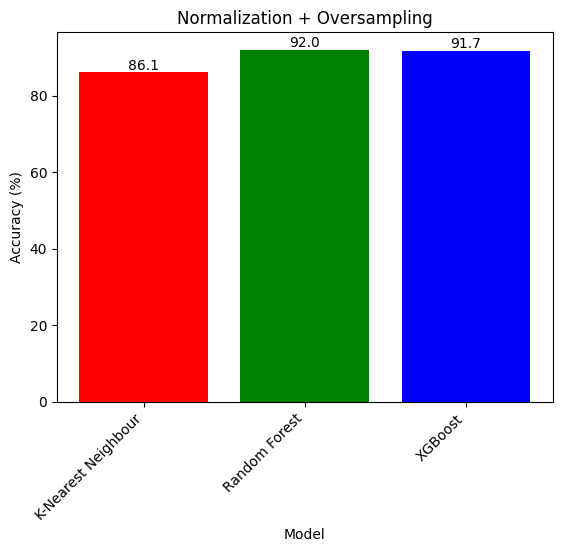

In [424]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambankan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round (yval, 2), ha='center', va='bottom')
plt.show()

In [425]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'Decision Tree'], 
                            'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,91.4
2,Decision Tree,89.2


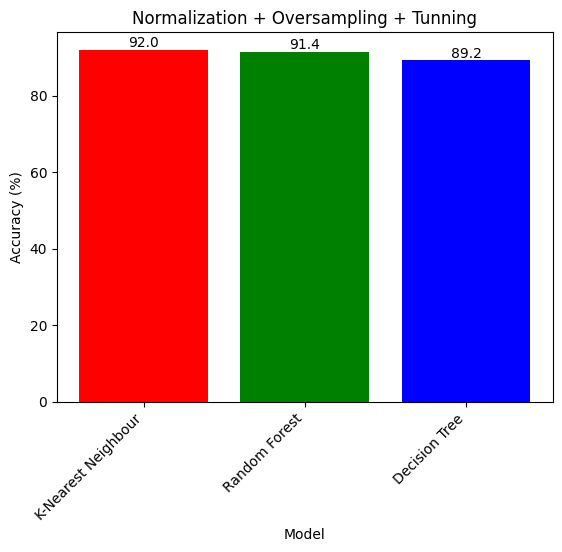

In [426]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [427]:
# Data frame
model_compBest = pd.DataFrame({'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample', 'XGB OverSample Standarization Tunning'],
                               'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote*100, accuracy_xgb_smote_normal_Tun*100]
})

model_compBest.head()

,Model,Accuracy
0,K-Nearest Neighbour OverSample Tunning,92.0
1,Random Forest OverSample,92.0
2,XGB OverSample Standarization Tunning,89.2


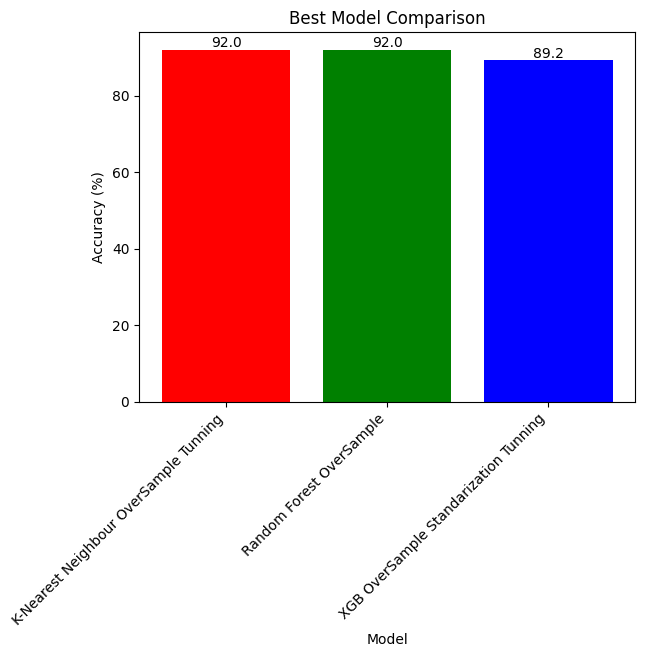

In [428]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

### 9) Streamlit (simpan model)


In [429]:
# Menyimpan model yang dipilih untuk dideploy ke streamlit

import pickle

# # Simpan model ke file
# with open('model/knn_3.pkl', 'wb') as file:
#     pickle.dump(knn_model, file)
    
# # Simpan model ke file
# with open('model/scaler.pkl', 'wb') as scaler_file:
#     pickle.dump(scaler, scaler_file)

model_info = {'dataframe' : dfClean, 'model' : model_rf_smote, 'accuracy' : accuracy_rf_smote*100, 'scaler' : scaler}
with open('model/model_selected.pkl', 'wb') as file :
    pickle.dump(model_info, file)




### 10) Kesimpulan